In [23]:
import gzip
import sys
import os
import binascii
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [24]:
EC = "data/EC_OHLC_30.csv.gz"
ES = "data/ES_OHLC_30.csv.gz"
FV = "data/FV_OHLC_30.csv.gz"
NQ = "data/NQ_OHLC_30.csv.gz"
TY = "data/TY_OHLC_30.csv.gz"
UB = "data/UB_OHLC_30.csv.gz"
US = "data/US_OHLC_30.csv.gz"

In [25]:
class OHLC:

    def __init__(self, ts0, O, H, L, C, T, V, ts=None):
        self.ts0, self.O, self.H, self.L, self.C, self.T, self.V, self.ts = ts0, O, H, L, C, T, V, ts
        if self.ts is None : self.ts = self.ts0

    def __str__(self):
        return ("%s,%10.6f,%10.6f,%10.6f,%10.6f,%6d,%6d") % (str(self.ts0),self.O, self.H, self.L, self.C, self.T, int(self.V))

In [26]:
class Utils:

    def DT(year, month, day, hour, minute, second):
        return datetime.datetime(year, month, day, hour, minute, second, 0)

    def getDT(d, t, micros=False):
        if "/" in d:
            dv = d.split("/")
            year, month, day = int(dv[2]), int(dv[0]), int(dv[1])
        else:
            dv = d.split("-")
            year, month, day = int(dv[0]), int(dv[1]), int(dv[2])
        tv =  t.split(":")
        try:
            h, m, s = int(tv[0]), int(tv[1]), int(tv[2].split(".")[0])
            us = 0 if micros == False else int(tv[2].split(".")[-1])*1000
        except:
            print("Error parsing datetime time=%s, date=%s" % (t, d))
            return datetime.datetime(2018,1,1)
        return datetime.datetime(year, month, day, h,m,s,us)

    def parse(line):
        # trades data : date, time, price, qty, flag -> datetime, price , qty
        if type(line) != str: line = line.decode("ascii")
        dv = line.strip().split(",")
        return OHLC(Utils.getDT(dv[0].split(" ")[0],dv[0].split(" ")[1]),
                    float(dv[1]), float(dv[2]), float(dv[3]),float(dv[4]),int(dv[5]),float(dv[6]))

In [27]:
class ReadOHLC:

    def read(infile):
        records=[]
        with gzip.open(infile) as rdr:
            for line in rdr:
                records.append(Utils.parse(line))
        return records

In [28]:
def sortByMax(hist):
    return sorted(hist, key = lambda x : x.H - x.L, reverse=True)


In [29]:
def getRecords(hist, start, end):
    rec = []
    for h in hist:
        if h.ts > end :
            break
        if h.ts >= start :
            rec.append(h)
    return rec


In [33]:
def main(filecode):
    infile = filecode
    hist = ReadOHLC.read(infile)
    records = sortByMax(hist)
    for i,r in enumerate(records):
        print("%s, %10.6f, %10.6f" % (r, r.H - r.L, r.O - r.C))
        if i > 20 : break
    recs = getRecords(hist, Utils.DT(2018, 2, 5, 0, 0, 0), Utils.DT(2018, 2 ,6, 0, 0,0))
    
    print(recs[0])
    print(recs[-1])
    px = [r.O for r in recs]
    x = [i for i in range(len(px))]
    plt.plot(x, px)
    plt.show()

2018-02-14 07:30:00,  1.237300,  1.237950,  1.233250,  1.233900,  1737,  4430,   0.004700,   0.003400
2018-06-14 06:45:00,  1.181950,  1.185600,  1.181650,  1.184700,  1190,  3393,   0.003950,  -0.002750
2018-08-20 19:33:30,  1.152850,  1.156450,  1.152850,  1.156250,  1398,  4337,   0.003600,  -0.003400
2018-05-10 07:30:00,  1.191100,  1.194550,  1.191000,  1.193700,  1645,  5406,   0.003550,  -0.002600
2018-12-07 07:30:00,  1.137600,  1.140800,  1.137400,  1.140550,  1171,  3095,   0.003400,  -0.002950
2018-03-09 07:30:00,  1.229200,  1.231450,  1.228050,  1.228600,  1368,  3582,   0.003400,   0.000600
2018-08-10 00:09:30,  1.154100,  1.154100,  1.150750,  1.151250,  2548,  8469,   0.003350,   0.002850
2018-05-04 07:30:00,  1.199750,  1.203000,  1.199750,  1.201550,   946,  2614,   0.003250,  -0.001800
2018-06-13 13:00:00,  1.179350,  1.179350,  1.176200,  1.178150,   879,  2436,   0.003150,   0.001200
2018-02-02 07:30:00,  1.252350,  1.252800,  1.249700,  1.250300,  1187,  3228,   0

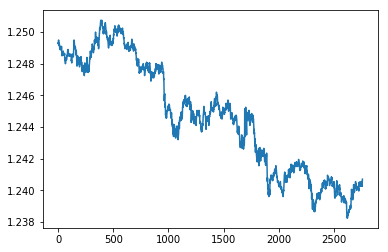

In [34]:
main(EC)

2018-12-19 13:00:00,2586.500000,2592.000000,2563.000000,2566.250000,  5094, 13101,  29.000000,  20.250000
2018-02-14 07:30:00,2675.250000,2675.250000,2651.000000,2651.500000,  3499, 19782,  24.250000,  23.750000
2018-02-05 15:14:30,2622.250000,2622.750000,2601.750000,2607.500000,  2636, 17207,  21.000000,  14.750000
2018-12-05 17:00:00,2713.250000,2714.000000,2693.500000,2693.500000,   854,  4269,  20.500000,  19.750000
2018-12-05 17:00:30,2694.500000,2696.750000,2678.000000,2678.000000,   543,  2644,  18.750000,  16.500000
2019-01-30 13:00:00,2659.000000,2673.750000,2655.000000,2667.000000,  4218, 19014,  18.750000,  -8.000000
2018-12-05 17:01:30,2674.250000,2676.500000,2658.000000,2661.000000,   430,  2438,  18.500000,  13.250000
2018-02-05 14:12:30,2657.500000,2672.000000,2655.500000,2671.250000,  3404, 12502,  16.500000, -13.750000
2018-02-05 19:48:30,2576.500000,2576.500000,2560.750000,2561.500000,  1273,  4413,  15.750000,  15.000000
2018-12-19 12:59:30,2577.250000,2589.750000,25

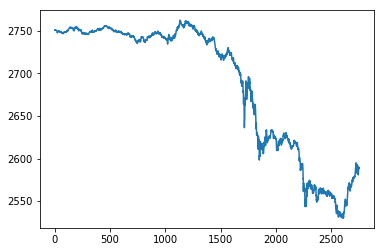

In [35]:
main(ES)

2019-01-04 07:30:00,115.085938,115.093750,114.843750,114.843750,   924, 14849,   0.250000,   0.242188
2018-02-14 07:30:00,114.656250,114.656250,114.437500,114.460938,  1688, 23893,   0.218750,   0.195312
2018-05-10 07:30:00,113.320312,113.539062,113.320312,113.429688,  1514, 26360,   0.218750,  -0.109376
2019-01-30 13:00:00,114.335938,114.453125,114.250000,114.445312,   556,  9404,   0.203125,  -0.109374
2019-03-08 07:30:00,114.906250,115.046875,114.851562,115.039062,   912, 14429,   0.195313,  -0.132812
2018-07-06 07:30:00,113.625000,113.812500,113.625000,113.687500,  1233, 12910,   0.187500,  -0.062500
2018-06-07 12:35:00,113.609375,113.632812,113.453125,113.468750,   742, 18148,   0.179687,   0.140625
2018-01-12 07:30:00,115.578125,115.578125,115.406250,115.421875,  1809, 32935,   0.171875,   0.156250
2018-02-02 07:30:00,114.562500,114.562500,114.390625,114.406250,  1020, 22010,   0.171875,   0.156250
2018-02-05 14:08:00,115.101562,115.140625,114.968750,114.976562,  1440, 35933,   0

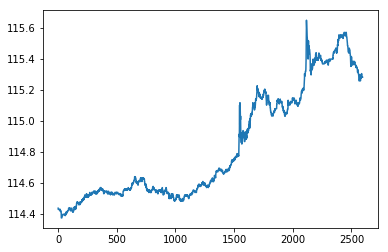

In [36]:
main(FV)

2018-10-30 15:05:00,6814.750000,6848.750000,6758.000000,6833.750000,  1921,  3683,  90.750000, -19.000000
2018-12-19 13:00:00,6593.250000,6610.000000,6536.750000,6541.000000,  2242,  3619,  73.250000,  52.250000
2018-02-14 07:30:00,6593.500000,6593.500000,6539.000000,6539.250000,  1624,  2523,  54.500000,  54.250000
2018-12-05 17:01:30,6730.750000,6731.000000,6678.250000,6679.250000,   211,   616,  52.750000,  51.500000
2018-07-26 15:01:30,7378.000000,7413.000000,7363.000000,7412.750000,  1349,  2427,  50.000000, -34.750000
2018-05-01 15:30:00,6691.000000,6737.500000,6688.750000,6734.500000,  1576,  2749,  48.750000, -43.500000
2018-07-26 15:01:00,7410.250000,7410.250000,7362.000000,7380.000000,  2648,  4629,  48.250000,  30.250000
2018-12-05 17:00:00,6834.500000,6838.000000,6790.000000,6790.000000,   272,   639,  48.000000,  44.500000
2018-10-05 07:30:00,7496.750000,7524.750000,7480.250000,7520.750000,  1498,  2402,  44.500000, -24.000000
2018-02-14 07:32:30,6499.250000,6499.500000,64

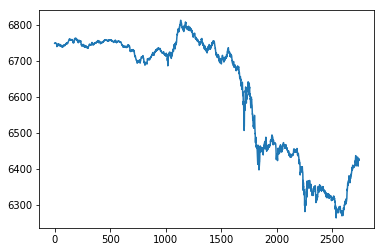

In [37]:
main(NQ)

2019-01-04 07:30:00,122.781250,122.796875,122.437500,122.437500,  1216, 27005,   0.359375,   0.343750
2018-02-14 07:30:00,121.109375,121.109375,120.765625,120.796875,  2180, 49958,   0.343750,   0.312500
2019-03-08 07:30:00,122.687500,122.921875,122.593750,122.906250,  1374, 31758,   0.328125,  -0.218750
2018-02-05 14:08:00,121.859375,121.937500,121.625000,121.640625,  1489, 36952,   0.312500,   0.218750
2018-05-10 07:30:00,119.359375,119.671875,119.359375,119.515625,  1848, 58121,   0.312500,  -0.156250
2019-01-30 13:00:00,121.640625,121.796875,121.500000,121.796875,   774, 17867,   0.296875,  -0.156250
2018-03-21 13:00:00,120.000000,120.250000,119.968750,120.203125,   900, 12365,   0.281250,  -0.203125
2018-06-07 12:35:00,119.984375,120.015625,119.734375,119.750000,  1183, 32940,   0.281250,   0.234375
2018-01-12 07:30:00,122.984375,123.000000,122.734375,122.750000,  1756, 41930,   0.265625,   0.234375
2018-02-02 07:30:00,121.140625,121.156250,120.890625,120.906250,  1165, 38255,   0

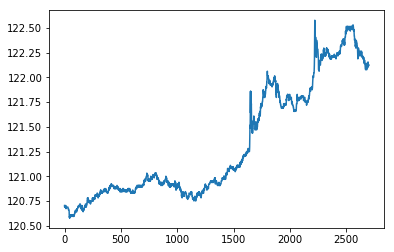

In [38]:
main(TY)

2018-02-05 14:08:00,160.593750,160.906250,159.750000,159.812500,   975,  3036,   1.156250,   0.781250
2018-02-05 14:07:30,159.687500,160.593750,159.687500,160.593750,   700,  2028,   0.906250,  -0.906250
2018-07-06 07:30:00,160.625000,161.468750,160.625000,160.781250,   392,  1449,   0.843750,  -0.156250
2019-01-04 07:30:00,163.218750,163.250000,162.500000,162.656250,   370,  1020,   0.750000,   0.562500
2018-01-12 07:30:00,164.000000,164.000000,163.312500,163.343750,   323,   934,   0.687500,   0.656250
2018-05-10 07:30:00,155.843750,156.531250,155.843750,156.125000,   488,  2108,   0.687500,  -0.281250
2018-06-07 12:35:00,157.968750,158.062500,157.375000,157.468750,   534,  2029,   0.687500,   0.500000
2018-02-14 07:30:00,157.437500,157.437500,156.812500,156.968750,   589,  1796,   0.625000,   0.468750
2018-09-07 07:30:00,157.937500,157.937500,157.312500,157.500000,   472,  1944,   0.625000,   0.437500
2018-01-05 07:30:00,166.187500,166.718750,166.156250,166.593750,   306,   638,   0

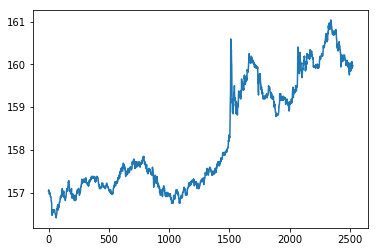

In [39]:
main(UB)

2018-02-05 14:08:00,147.312500,147.500000,146.687500,146.750000,  1654,  8502,   0.812500,   0.562500
2018-02-05 14:07:30,146.656250,147.312500,146.656250,147.281250,  1316,  5921,   0.656250,  -0.625000
2018-07-06 07:30:00,145.718750,146.343750,145.718750,145.843750,   732,  4994,   0.625000,  -0.125000
2019-01-04 07:30:00,147.906250,147.937500,147.375000,147.406250,   577,  2279,   0.562500,   0.500000
2018-05-10 07:30:00,142.843750,143.375000,142.843750,143.093750,   816,  5773,   0.531250,  -0.250000
2018-06-07 12:35:00,144.125000,144.187500,143.656250,143.718750,   810,  4568,   0.531250,   0.406250
2018-01-12 07:30:00,150.281250,150.281250,149.781250,149.843750,  1025,  4723,   0.500000,   0.437500
2018-02-14 07:30:00,145.031250,145.062500,144.562500,144.593750,   851,  3700,   0.500000,   0.437500
2018-01-11 12:01:30,149.968750,150.437500,149.968750,150.406250,   651,  6319,   0.468750,  -0.437500
2018-09-07 07:30:00,143.500000,143.500000,143.031250,143.125000,   806,  3635,   0

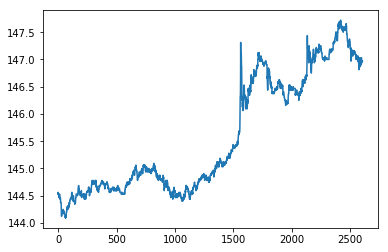

In [40]:
main(US)